# Behind The Scenes of Illini Esports Growth and Engagement Analysis
> This post is my documentation on the code I wrote to generate the graphs and figures from my [Illini Esports Growth and Engagement Analysis Post](https://www.linkedin.com/posts/progressedd_illini-esports-growth-and-engagement-analysis-activity-6801017566077743104-J5Qv). I have also posted the report to my [github repository](https://github.com/progressEdd/Illini-Esports-Analysis/tree/master#illini-esports-growth-and-engagement-analysis) Feel free to read the original document as it contains the full written analysis and insights from my team. I gained a lot of experience working with date time objects and ggplot2 in this project.
- comments: true

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Behind-The-Scenes-of-Illini-Esports-Growth-and-Engagement-Analysis" data-toc-modified-id="Behind-The-Scenes-of-Illini-Esports-Growth-and-Engagement-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Behind The Scenes of Illini Esports Growth and Engagement Analysis</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Growth-and-Activation" data-toc-modified-id="Growth-and-Activation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Growth and Activation</a></span></li><li><span><a href="#Historical-Engagement" data-toc-modified-id="Historical-Engagement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Historical Engagement</a></span></li><li><span><a href="#Engagement-by-last-28-days" data-toc-modified-id="Engagement-by-last-28-days-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Engagement by last 28 days</a></span></li></ul></li><li><span><a href="#ETL-on-Growth-and-Activation" data-toc-modified-id="ETL-on-Growth-and-Activation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ETL on Growth and Activation</a></span><ul class="toc-item"><li><span><a href="#Messing-around-with-date-time" data-toc-modified-id="Messing-around-with-date-time-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Messing around with date time</a></span><ul class="toc-item"><li><span><a href="#Loading-the-library" data-toc-modified-id="Loading-the-library-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Loading the library</a></span></li><li><span><a href="#Datetime-example" data-toc-modified-id="Datetime-example-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Datetime example</a></span></li><li><span><a href="#Tests-to-investigate-how-to-extract-date-time" data-toc-modified-id="Tests-to-investigate-how-to-extract-date-time-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Tests to investigate how to extract date time</a></span></li><li><span><a href="#Testing-substring-removal" data-toc-modified-id="Testing-substring-removal-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Testing substring removal</a></span><ul class="toc-item"><li><span><a href="#Removing-the-plus-sign" data-toc-modified-id="Removing-the-plus-sign-3.1.4.1"><span class="toc-item-num">3.1.4.1&nbsp;&nbsp;</span>Removing the plus sign</a></span></li><li><span><a href="#Removing-the-rest-of-zeros" data-toc-modified-id="Removing-the-rest-of-zeros-3.1.4.2"><span class="toc-item-num">3.1.4.2&nbsp;&nbsp;</span>Removing the rest of zeros</a></span></li></ul></li></ul></li><li><span><a href="#Removing-+00:00Z-from-the-whole-column" data-toc-modified-id="Removing-+00:00Z-from-the-whole-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Removing +00:00Z from the whole column</a></span><ul class="toc-item"><li><span><a href="#split-the-interval_start_timestamp" data-toc-modified-id="split-the-interval_start_timestamp-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>split the <code>interval_start_timestamp</code></a></span></li></ul></li><li><span><a href="#Making-the-new-dataframe" data-toc-modified-id="Making-the-new-dataframe-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Making the new dataframe</a></span></li><li><span><a href="#Testing-if-I-could-change-the-months-to-become-a-factor" data-toc-modified-id="Testing-if-I-could-change-the-months-to-become-a-factor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Testing if I could change the months to become a factor</a></span></li><li><span><a href="#Extracting-date-time" data-toc-modified-id="Extracting-date-time-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extracting date time</a></span><ul class="toc-item"><li><span><a href="#Joins-extraction" data-toc-modified-id="Joins-extraction-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Joins extraction</a></span></li><li><span><a href="#Sources-extraction" data-toc-modified-id="Sources-extraction-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Sources extraction</a></span></li><li><span><a href="#Leaves-extraction" data-toc-modified-id="Leaves-extraction-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Leaves extraction</a></span></li><li><span><a href="#Messages-extraction" data-toc-modified-id="Messages-extraction-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Messages extraction</a></span></li><li><span><a href="#Voices-extraction" data-toc-modified-id="Voices-extraction-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>Voices extraction</a></span></li><li><span><a href="#Communicators-extraction" data-toc-modified-id="Communicators-extraction-3.5.6"><span class="toc-item-num">3.5.6&nbsp;&nbsp;</span>Communicators extraction</a></span></li></ul></li><li><span><a href="#Identifying-Covid-vs-Normal-Time-Periods" data-toc-modified-id="Identifying-Covid-vs-Normal-Time-Periods-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Identifying Covid vs Normal Time Periods</a></span></li></ul></li><li><span><a href="#Data-Needed-For-Investigation" data-toc-modified-id="Data-Needed-For-Investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Needed For Investigation</a></span><ul class="toc-item"><li><span><a href="#Historical-data" data-toc-modified-id="Historical-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Historical data</a></span></li><li><span><a href="#Last-28-days" data-toc-modified-id="Last-28-days-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Last 28 days</a></span></li></ul></li><li><span><a href="#Data-Aggregation" data-toc-modified-id="Data-Aggregation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Aggregation</a></span><ul class="toc-item"><li><span><a href="#subsetting-by-year" data-toc-modified-id="subsetting-by-year-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>subsetting by year</a></span></li><li><span><a href="#Aggregating-by-year" data-toc-modified-id="Aggregating-by-year-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Aggregating by year</a></span><ul class="toc-item"><li><span><a href="#2019" data-toc-modified-id="2019-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>2019</a></span></li><li><span><a href="#2020" data-toc-modified-id="2020-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>2020</a></span></li><li><span><a href="#2021" data-toc-modified-id="2021-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>2021</a></span></li></ul></li><li><span><a href="#Aggregating-by-month" data-toc-modified-id="Aggregating-by-month-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Aggregating by month</a></span><ul class="toc-item"><li><span><a href="#2019" data-toc-modified-id="2019-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>2019</a></span></li><li><span><a href="#2020" data-toc-modified-id="2020-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>2020</a></span></li><li><span><a href="#2021" data-toc-modified-id="2021-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>2021</a></span></li></ul></li><li><span><a href="#Testing-aggregations" data-toc-modified-id="Testing-aggregations-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Testing aggregations</a></span></li><li><span><a href="#Aggregating-by-category" data-toc-modified-id="Aggregating-by-category-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Aggregating by category</a></span><ul class="toc-item"><li><span><a href="#Joins" data-toc-modified-id="Joins-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Joins</a></span></li><li><span><a href="#Leaves" data-toc-modified-id="Leaves-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Leaves</a></span><ul class="toc-item"><li><span><a href="#Experimental-3d-agg" data-toc-modified-id="Experimental-3d-agg-5.5.2.1"><span class="toc-item-num">5.5.2.1&nbsp;&nbsp;</span>Experimental 3d agg</a></span></li></ul></li><li><span><a href="#Sources" data-toc-modified-id="Sources-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Sources</a></span></li><li><span><a href="#Communicators" data-toc-modified-id="Communicators-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Communicators</a></span></li></ul></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#all-joins" data-toc-modified-id="all-joins-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>all joins</a></span></li><li><span><a href="#All-leaves" data-toc-modified-id="All-leaves-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>All leaves</a></span></li><li><span><a href="#All-communicators" data-toc-modified-id="All-communicators-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>All communicators</a></span></li></ul></li><li><span><a href="#Multiple-Models-Excluding-Effect-of-Year" data-toc-modified-id="Multiple-Models-Excluding-Effect-of-Year-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiple Models Excluding Effect of Year</a></span><ul class="toc-item"><li><span><a href="#New-members-linear-model" data-toc-modified-id="New-members-linear-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>New members linear model</a></span></li><li><span><a href="#Total-messages-linear-model" data-toc-modified-id="Total-messages-linear-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Total messages linear model</a></span></li><li><span><a href="#Messages-experiments" data-toc-modified-id="Messages-experiments-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Messages experiments</a></span><ul class="toc-item"><li><span><a href="#Including-messages_per_communicator-in-full-model" data-toc-modified-id="Including-messages_per_communicator-in-full-model-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Including messages_per_communicator in full model</a></span></li><li><span><a href="#Including-messages_per_communicator-in-full-model" data-toc-modified-id="Including-messages_per_communicator-in-full-model-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Including messages_per_communicator in full model</a></span></li></ul></li><li><span><a href="#Voices-linear-model" data-toc-modified-id="Voices-linear-model-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Voices linear model</a></span></li><li><span><a href="#Communicators-linear-model" data-toc-modified-id="Communicators-linear-model-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Communicators linear model</a></span></li></ul></li><li><span><a href="#Testing-Year-Effect" data-toc-modified-id="Testing-Year-Effect-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testing Year Effect</a></span><ul class="toc-item"><li><span><a href="#New-members-multiple-regression-model" data-toc-modified-id="New-members-multiple-regression-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>New members multiple regression model</a></span></li><li><span><a href="#Total-messages-multiple-regression-model" data-toc-modified-id="Total-messages-multiple-regression-model-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Total messages multiple regression model</a></span></li><li><span><a href="#Voices-multiple-regression-model" data-toc-modified-id="Voices-multiple-regression-model-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Voices multiple regression model</a></span></li><li><span><a href="#Communicators-multiple-regression-model" data-toc-modified-id="Communicators-multiple-regression-model-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Communicators multiple regression model</a></span></li></ul></li></ul></div>

# EDA

## Growth and Activation

In [26]:
#collapse_output
working = "../../../../School/Graduate 2020-2021/03 - Spring 2021/BADM 577/Illini-Esports-Analysis/"

join = read.csv(paste(working,"guild-activation.csv", sep=""))
join

leave = read.csv(paste(working,"guild-leavers.csv",sep=""))
leave

source = read.csv(paste(working,"guild-joins-by-source.csv",sep=""))
source

interval_start_timestamp,new_members,pct_communicated,pct_opened_channels
<fct>,<int>,<dbl>,<dbl>
2019-03-29T00:00:00+00:00,2,50.00000,50.00000
2019-03-30T00:00:00+00:00,6,16.66667,33.33333
2019-03-31T00:00:00+00:00,8,25.00000,37.50000
2019-04-01T00:00:00+00:00,9,44.44444,33.33333
2019-04-02T00:00:00+00:00,2,50.00000,100.00000
2019-04-03T00:00:00+00:00,0,NA,NA
2019-04-04T00:00:00+00:00,2,100.00000,100.00000
2019-04-05T00:00:00+00:00,3,33.33333,0.00000
2019-04-06T00:00:00+00:00,2,0.00000,0.00000


interval_start_timestamp,days_in_guild,leavers
<fct>,<fct>,<int>
2019-03-29T00:00:00+00:00,'Members for 1 month+',1
2019-03-30T00:00:00+00:00,'Members for 1 month+',1
2019-03-30T00:00:00+00:00,'Members for < 1 month',1
2019-03-31T00:00:00+00:00,'Members for 1 month+',2
2019-03-31T00:00:00+00:00,'Members for < 1 month',1
2019-04-01T00:00:00+00:00,'Members for 1 month+',4
2019-04-02T00:00:00+00:00,'Members for 1 month+',1
2019-04-03T00:00:00+00:00,'Members for 1 month+',2
2019-04-03T00:00:00+00:00,'Members for < 1 month',2


interval_start_timestamp,discovery_joins,invites,vanity_joins
<fct>,<int>,<int>,<int>
2019-03-29T00:00:00+00:00,0,0,3
2019-03-30T00:00:00+00:00,0,0,7
2019-03-31T00:00:00+00:00,0,0,8
2019-04-01T00:00:00+00:00,0,0,11
2019-04-02T00:00:00+00:00,0,0,2
2019-04-03T00:00:00+00:00,0,0,1
2019-04-04T00:00:00+00:00,0,0,3
2019-04-05T00:00:00+00:00,0,0,4
2019-04-06T00:00:00+00:00,0,0,3


## Historical Engagement

In [27]:
#collapse_output
message = read.csv(paste(working,"guild-message-activity.csv",sep=""))
message

voice = read.csv(paste(working,"guild-voice-activity.csv",sep=""))
voice

communicator = read.csv(paste(working,"guild-communicators.csv",sep=""))
communicator

interval_start_timestamp,messages,messages_per_communicator
<fct>,<int>,<dbl>
2019-03-29T00:00:00+00:00,334,6.301887
2019-03-30T00:00:00+00:00,236,6.210526
2019-03-31T00:00:00+00:00,364,8.088889
2019-04-01T00:00:00+00:00,404,5.386667
2019-04-02T00:00:00+00:00,543,11.312500
2019-04-03T00:00:00+00:00,324,7.200000
2019-04-04T00:00:00+00:00,556,10.901961
2019-04-05T00:00:00+00:00,273,5.808511
2019-04-06T00:00:00+00:00,335,7.613636


interval_start_timestamp,speaking_minutes
<fct>,<int>
2019-03-29T00:00:00+00:00,0
2019-03-30T00:00:00+00:00,0
2019-03-31T00:00:00+00:00,0
2019-04-01T00:00:00+00:00,0
2019-04-02T00:00:00+00:00,0
2019-04-03T00:00:00+00:00,0
2019-04-04T00:00:00+00:00,0
2019-04-05T00:00:00+00:00,0
2019-04-06T00:00:00+00:00,0


interval_start_timestamp,visitors,pct_communicated
<fct>,<int>,<dbl>
2019-03-29T00:00:00+00:00,206,25.72816
2019-03-30T00:00:00+00:00,184,20.65217
2019-03-31T00:00:00+00:00,185,24.32432
2019-04-01T00:00:00+00:00,328,22.86585
2019-04-02T00:00:00+00:00,143,33.56643
2019-04-03T00:00:00+00:00,271,16.60517
2019-04-04T00:00:00+00:00,381,13.38583
2019-04-05T00:00:00+00:00,190,24.73684
2019-04-06T00:00:00+00:00,163,26.99387


## Engagement by last 28 days

In [28]:
#collapse_output
text = read.csv(paste(working,"popular-text-channels.csv",sep=""))
text
voice_channel = read.csv(paste(working,"popular-voice-channels.csv",sep=""))
voice_channel

interval_start_timestamp,channel_name,channel_id,readers,chatters,messages
<fct>,<fct>,<dbl>,<int>,<int>,<int>
2021-03-27T00:00:00+00:00,general,2.124359e+17,218,51,264
2021-03-27T00:00:00+00:00,hearthstone,2.124361e+17,3,0,0
2021-03-27T00:00:00+00:00,overwatch,2.124362e+17,98,38,794
2021-03-27T00:00:00+00:00,lol,2.124362e+17,97,31,181
2021-03-27T00:00:00+00:00,csgo,2.124363e+17,29,4,5
2021-03-27T00:00:00+00:00,dota2,2.124364e+17,17,5,11
2021-03-27T00:00:00+00:00,announcements,2.124422e+17,880,1,4
2021-03-27T00:00:00+00:00,other-games,2.127412e+17,46,7,13
2021-03-27T00:00:00+00:00,suggestions,2.130108e+17,27,4,5


interval_start_timestamp,channel_name,channel_id,listeners,communicators
<fct>,<fct>,<dbl>,<int>,<int>
2021-03-27T00:00:00+00:00,AFK Channel,2.559102e+17,7,0
2021-03-27T00:00:00+00:00,Overwatch Oasis,2.617080e+17,17,16
2021-03-27T00:00:00+00:00,LoL In-House Lobby,2.834215e+17,2,2
2021-03-27T00:00:00+00:00,Overwatch Room 1,3.533817e+17,17,16
2021-03-27T00:00:00+00:00,General Gaming,5.960341e+17,10,10
2021-03-27T00:00:00+00:00,Music Channel,5.960341e+17,2,3
2021-03-27T00:00:00+00:00,Overwatch Room 2,6.000934e+17,14,14
2021-03-27T00:00:00+00:00,Throwstack Oasis,6.153540e+17,14,14
2021-03-27T00:00:00+00:00,Valorant Haven,6.958620e+17,3,3


# ETL on Growth and Activation

## Messing around with date time

### Loading the library

In [29]:
library(lubridate)

### Datetime example
I grabbed this example from [astrostats.psu](https://astrostatistics.psu.edu/su07/R/html/base/html/format.Date.html). The Berkely Stat Dates page [Dates and Times in R](https://www.stat.berkeley.edu/~s133/dates.html) was a great reference for the code and values for datetime

| Code | Value                             |
|------|-----------------------------------|
| %d   | Day of the month (decimal number) |
| %m   | Month (decimal number)            |
| %b   | Month (abbreviated)               |
| %B   | Month (full name)                 |
| %y   | Year (2 digit)                    |
| %Y   | Year (4 digit)                    |

In [30]:
## read in date/time info in format 'm/d/y h:m:s'
dates <- c("02/27/92", "02/27/92", "01/14/92", "02/28/92", "02/01/92")
times <- c("23:03:20", "22:29:56", "01:03:30", "18:21:03", "16:56:26")
x <- paste(dates, times)
strptime(x, "%m/%d/%y %H:%M:%S")
strptime(x, "%m/")

[1] "1992-02-27 23:03:20 CST" "1992-02-27 22:29:56 CST"
[3] "1992-01-14 01:03:30 CST" "1992-02-28 18:21:03 CST"
[5] "1992-02-01 16:56:26 CST"

[1] NA NA NA NA NA

### Tests to investigate how to extract date time
These were scuffed tests I used to learn how to extract the date time
* the variable `test` made me realize removing `+00:00` and replacing it with a `Z` would make the data in a format that can be read by R
* the variable `test2` was my attempt to try getting it for an entire column

In [63]:
test = "2021-03-27T00:00:00Z"
str(ymd_hms(test))

test2 = join$interval_start_timestamp
#test2
#ymd_hms(join$interval_start_timestamp)
head(strptime(test2, "%Y-%m-%dT%H:%M:%SZ"))

 POSIXct[1:1], format: "2021-03-27"


[1] "2019-03-29 CDT" "2019-03-30 CDT" "2019-03-31 CDT" "2019-04-01 CDT"
[5] "2019-04-02 CDT" "2019-04-03 CDT"

While performing my tests, I struggled understanding format of the date was in, a search of a [2021-03-27T00:00:00+00:00 datatype](https://duckduckgo.com/?q=2021-03-27T00%3A00%3A00%2B00%3A00+datatype&t=ffab&ia=web) pointed me to a stack overflow page that helped me learn more about python functions [Date Time Formats in Python](https://stackoverflow.com/questions/17594298/date-time-formats-in-python).

### Testing substring removal
* with a understanding of what I needed to make it possible, I moved on to learn about substring replacement. This took a long time to figure out and understand.

#### Removing the plus sign
a search of [R remove all text after plus sign](https://duckduckgo.com/?q=R+remove+all+text+after+plus+sign&t=ffab&ia=web) helped me break through this barrier I found that this answer on stackoverflow was particularly helpful in removing the `+` sign [How to remove + (plus sign) from string in R?](https://stackoverflow.com/a/35807737). gsub seemed to be the recommend choice among all answers

#### Removing the rest of zeros
I found the following stackoverflow answer that had a example for how to remove the rest of a string [Remove all text before colon](https://stackoverflow.com/a/12297991). I couldn't remember how to remove everything after the + so the following example from stevencarlislewalker's blog was particularly helpful in refreshing my memory [Remove (or replace) everything before or after a specified character in R strings](https://stevencarlislewalker.wordpress.com/2013/02/13/remove-or-replace-everything-before-or-after-a-specified-character-in-r-strings/)

In [54]:
gsub("\\+.*", 'Z', "2021-03-27T00:00:00+00:00")

[1] "2021-03-27T00:00:00Z"

## Removing +00:00Z from the whole column

these were tests I ran to automate this for all the datetime rows.

In [33]:
#collapse_output
#join[1,1] = gsub("\\+.*", 'Z', join[1,1])
#join

join[,1] = gsub("\\+.*", 'Z', join[,1])
join

interval_start_timestamp,new_members,pct_communicated,pct_opened_channels
<chr>,<int>,<dbl>,<dbl>
2019-03-29T00:00:00Z,2,50.00000,50.00000
2019-03-30T00:00:00Z,6,16.66667,33.33333
2019-03-31T00:00:00Z,8,25.00000,37.50000
2019-04-01T00:00:00Z,9,44.44444,33.33333
2019-04-02T00:00:00Z,2,50.00000,100.00000
2019-04-03T00:00:00Z,0,NA,NA
2019-04-04T00:00:00Z,2,100.00000,100.00000
2019-04-05T00:00:00Z,3,33.33333,0.00000
2019-04-06T00:00:00Z,2,0.00000,0.00000


### split the `interval_start_timestamp`
Once I got it working on a row, I applied what I learned above to extract the year, month, and day from the initial datetime object
Later when I was generating the bar charts, I had issues ordering the data by calendar months, a quick search yielded [Sorting months in R](https://stackoverflow.com/a/9769735) I learned that passing `months` into `factor` with the `levels = month.name` would allow me to sort by the months

In [34]:
year = year(as.POSIXlt(join$interval_start_timestamp))

month = factor(months(as.POSIXlt(join$interval_start_timestamp)),levels = month.name)

day = weekdays(as.POSIXlt(join$interval_start_timestamp))

## Making the new dataframe

After making the split dataframes, I used a cbind to append the columns to the original dataset and reordered the dataset.

In [35]:
#collapse_output
joins = cbind(join, year, month,day)
joins

joins = joins[,c(1,5,6,7,2,3,4)]
joins

interval_start_timestamp,new_members,pct_communicated,pct_opened_channels,year,month,day
<chr>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2019-03-29T00:00:00Z,2,50.00000,50.00000,2019,March,Friday
2019-03-30T00:00:00Z,6,16.66667,33.33333,2019,March,Saturday
2019-03-31T00:00:00Z,8,25.00000,37.50000,2019,March,Sunday
2019-04-01T00:00:00Z,9,44.44444,33.33333,2019,April,Monday
2019-04-02T00:00:00Z,2,50.00000,100.00000,2019,April,Tuesday
2019-04-03T00:00:00Z,0,NA,NA,2019,April,Wednesday
2019-04-04T00:00:00Z,2,100.00000,100.00000,2019,April,Thursday
2019-04-05T00:00:00Z,3,33.33333,0.00000,2019,April,Friday
2019-04-06T00:00:00Z,2,0.00000,0.00000,2019,April,Saturday


interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels
<chr>,<dbl>,<fct>,<fct>,<int>,<dbl>,<dbl>
2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000
2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333
2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000
2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333
2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000
2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA
2019-04-04T00:00:00Z,2019,April,Thursday,2,100.00000,100.00000
2019-04-05T00:00:00Z,2019,April,Friday,3,33.33333,0.00000
2019-04-06T00:00:00Z,2019,April,Saturday,2,0.00000,0.00000


## Testing if I could change the months to become a factor

In [36]:
# test to see what would happen if I could convert a months output as a factor
factor(months(as.POSIXlt(join$interval_start_timestamp)),levels = month.name)[1:20]

[1] March March March April April April April April April April April April
[13] April April April April April April April April
12 Levels: January February March April May June July August ... December

## Extracting date time

run the following cell to extract year, month, day

### Joins extraction

In [37]:
#collapse_output
# substring replacement
join[,1] = gsub("\\+.*", 'Z', join[,1])

# individual extraction
year = factor(year(as.POSIXlt(join[,1])))
month = factor(months(as.POSIXlt(join[,1])),levels = month.name)
day = weekdays(as.POSIXlt(join[,1]))

# appending new indivually extracted dates
joins = cbind(join, year, month,day)
joins = joins[,c(1,5,6,7,2,3,4)]
joins

interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000
2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333
2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000
2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333
2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000
2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA
2019-04-04T00:00:00Z,2019,April,Thursday,2,100.00000,100.00000
2019-04-05T00:00:00Z,2019,April,Friday,3,33.33333,0.00000
2019-04-06T00:00:00Z,2019,April,Saturday,2,0.00000,0.00000


### Sources extraction

In [38]:
#collapse_output
# substring replacement
source[,1] = gsub("\\+.*", 'Z', source[,1])

# individual extraction
year = factor(year(as.POSIXlt(source[,1])))
month = factor(months(as.POSIXlt(source[,1])),levels = month.name)
day = weekdays(as.POSIXlt(source[,1]))

# appending new indivually extracted dates
sources = cbind(source, year, month,day)
sources = sources[,c(1,5,6,7,2,3,4)]
sources

interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>
2019-03-29T00:00:00Z,2019,March,Friday,0,0,3
2019-03-30T00:00:00Z,2019,March,Saturday,0,0,7
2019-03-31T00:00:00Z,2019,March,Sunday,0,0,8
2019-04-01T00:00:00Z,2019,April,Monday,0,0,11
2019-04-02T00:00:00Z,2019,April,Tuesday,0,0,2
2019-04-03T00:00:00Z,2019,April,Wednesday,0,0,1
2019-04-04T00:00:00Z,2019,April,Thursday,0,0,3
2019-04-05T00:00:00Z,2019,April,Friday,0,0,4
2019-04-06T00:00:00Z,2019,April,Saturday,0,0,3


### Leaves extraction

In [64]:
#collapse_output
# substring replacement
leave[,1] = gsub("\\+.*", 'Z', leave[,1])

# individual extraction
year = factor(year(as.POSIXlt(leave[,1])))
month = factor(months(as.POSIXlt(leave[,1])),levels = month.name)
day = weekdays(as.POSIXlt(leave[,1]))

# appending new indivually extracted dates
leave
leaves = cbind(leave, year, month,day)
leaves
leaves = leaves[,c(1,4,5,6,2,3)]
leaves

interval_start_timestamp,days_in_guild,leavers
<chr>,<fct>,<int>
2019-03-29T00:00:00Z,'Members for 1 month+',1
2019-03-30T00:00:00Z,'Members for 1 month+',1
2019-03-30T00:00:00Z,'Members for < 1 month',1
2019-03-31T00:00:00Z,'Members for 1 month+',2
2019-03-31T00:00:00Z,'Members for < 1 month',1
2019-04-01T00:00:00Z,'Members for 1 month+',4
2019-04-02T00:00:00Z,'Members for 1 month+',1
2019-04-03T00:00:00Z,'Members for 1 month+',2
2019-04-03T00:00:00Z,'Members for < 1 month',2


interval_start_timestamp,days_in_guild,leavers,year,month,day
<chr>,<fct>,<int>,<fct>,<fct>,<fct>
2019-03-29T00:00:00Z,'Members for 1 month+',1,2019,March,Friday
2019-03-30T00:00:00Z,'Members for 1 month+',1,2019,March,Saturday
2019-03-30T00:00:00Z,'Members for < 1 month',1,2019,March,Saturday
2019-03-31T00:00:00Z,'Members for 1 month+',2,2019,March,Sunday
2019-03-31T00:00:00Z,'Members for < 1 month',1,2019,March,Sunday
2019-04-01T00:00:00Z,'Members for 1 month+',4,2019,April,Monday
2019-04-02T00:00:00Z,'Members for 1 month+',1,2019,April,Tuesday
2019-04-03T00:00:00Z,'Members for 1 month+',2,2019,April,Wednesday
2019-04-03T00:00:00Z,'Members for < 1 month',2,2019,April,Wednesday


interval_start_timestamp,year,month,day,days_in_guild,leavers
<chr>,<fct>,<fct>,<fct>,<fct>,<int>
2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1
2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4
2019-04-02T00:00:00Z,2019,April,Tuesday,'Members for 1 month+',1
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for 1 month+',2
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for < 1 month',2


### Messages extraction

In [40]:
#collapse_output
# substring replacement
message[,1] = gsub("\\+.*", 'Z', message[,1])

# individual extraction
year = factor(year(as.POSIXlt(message[,1])))
month = factor(months(as.POSIXlt(message[,1])),levels = month.name)
day = weekdays(as.POSIXlt(message[,1]))

# appending new indivually extracted dates
messages = cbind(message, year, month,day)
messages
messages = messages[,c(1,4,5,6,2,3)]
messages

interval_start_timestamp,messages,messages_per_communicator,year,month,day
<chr>,<int>,<dbl>,<fct>,<fct>,<fct>
2019-03-29T00:00:00Z,334,6.301887,2019,March,Friday
2019-03-30T00:00:00Z,236,6.210526,2019,March,Saturday
2019-03-31T00:00:00Z,364,8.088889,2019,March,Sunday
2019-04-01T00:00:00Z,404,5.386667,2019,April,Monday
2019-04-02T00:00:00Z,543,11.312500,2019,April,Tuesday
2019-04-03T00:00:00Z,324,7.200000,2019,April,Wednesday
2019-04-04T00:00:00Z,556,10.901961,2019,April,Thursday
2019-04-05T00:00:00Z,273,5.808511,2019,April,Friday
2019-04-06T00:00:00Z,335,7.613636,2019,April,Saturday


interval_start_timestamp,year,month,day,messages,messages_per_communicator
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>
2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887
2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526
2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889
2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667
2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500
2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000
2019-04-04T00:00:00Z,2019,April,Thursday,556,10.901961
2019-04-05T00:00:00Z,2019,April,Friday,273,5.808511
2019-04-06T00:00:00Z,2019,April,Saturday,335,7.613636


### Voices extraction

In [41]:
#collapse_output
# substring replacement
voice[,1] = gsub("\\+.*", 'Z', voice[,1])

# individual extraction
year = factor(year(as.POSIXlt(voice[,1])))
month = factor(months(as.POSIXlt(voice[,1])),levels = month.name)
day = weekdays(as.POSIXlt(voice[,1]))

# appending new indivually extracted dates
voices = cbind(voice, year, month,day)
voices = voices[,c(1,3,4,5,2)]
voices

interval_start_timestamp,year,month,day,speaking_minutes
<chr>,<fct>,<fct>,<fct>,<int>
2019-03-29T00:00:00Z,2019,March,Friday,0
2019-03-30T00:00:00Z,2019,March,Saturday,0
2019-03-31T00:00:00Z,2019,March,Sunday,0
2019-04-01T00:00:00Z,2019,April,Monday,0
2019-04-02T00:00:00Z,2019,April,Tuesday,0
2019-04-03T00:00:00Z,2019,April,Wednesday,0
2019-04-04T00:00:00Z,2019,April,Thursday,0
2019-04-05T00:00:00Z,2019,April,Friday,0
2019-04-06T00:00:00Z,2019,April,Saturday,0


### Communicators extraction

In [42]:
#collapse_output
# substring replacement
communicator[,1] = gsub("\\+.*", 'Z', communicator[,1])

# individual extraction
year = factor(year(as.POSIXlt(communicator[,1])))
month = factor(months(as.POSIXlt(communicator[,1])),levels = month.name)
day = weekdays(as.POSIXlt(communicator[,1]))
communicator

# appending new individually extracted dates
communicators = cbind(communicator, year, month,day)
communicators = communicators[,c(1,4,5,6,2,3)]
communicators$total_communicated = communicators$visitors * communicators$pct_communicated/100

interval_start_timestamp,visitors,pct_communicated
<chr>,<int>,<dbl>
2019-03-29T00:00:00Z,206,25.72816
2019-03-30T00:00:00Z,184,20.65217
2019-03-31T00:00:00Z,185,24.32432
2019-04-01T00:00:00Z,328,22.86585
2019-04-02T00:00:00Z,143,33.56643
2019-04-03T00:00:00Z,271,16.60517
2019-04-04T00:00:00Z,381,13.38583
2019-04-05T00:00:00Z,190,24.73684
2019-04-06T00:00:00Z,163,26.99387


## Identifying Covid vs Normal Time Periods

The following modifications are my attempts to identify covid years for our analysis, I could edit the csv, but I decided to explore R to practice etl for larger datasets. The Fall 2017 STAT 200 course page on [Regression With Factor Variables](http://courses.atlas.illinois.edu/fall2017/STAT/STAT200/RProgramming/RegressionFactors.html) was particularly helpful as a reference when I was trying to have R use `Covid` as the default factor instead of `Normal`, having `Covid` as the default factor will be important when I generate the linear models and interpret the outputs. I would also recommend reading the berkley stats page on ["Factors in R"](https://www.stat.berkeley.edu/~s133/factors.html) to get a deeper understanding of how to convert factors with dates


I could have applied the `relevel()` to the `as.factor` line as seen in this stack overflow answer [How to force R to use a specified factor level as reference in a regression?](https://stackoverflow.com/a/47815709), but I realized it was much easier to read/run the code in my head line by line than to pass into multiple functions

In [55]:
#collapse_output
# marking covid and non covid months
joins$year_type = as.double(joins$year)
joins$year_type[joins$year_type == 1 ] <- "Normal"
joins$year_type[joins$year_type == 2] <- "Covid"
joins$year_type[joins$year_type == 3] <- "Covid"
joins$year_type = as.factor(joins$year_type)
joins$year_type = relevel(joins$year_type, ref = 2)
head(joins)

leaves$year_type = as.double(leaves$year)
leaves$year_type[leaves$year_type == 1 ] <- "Normal"
leaves$year_type[leaves$year_type ==2] <- "Covid"
leaves$year_type[leaves$year_type ==3] <- "Covid"
leaves$year_type = as.factor(leaves$year_type)
leaves$year_type = relevel(leaves$year_type, ref = 2)
head(leaves)

sources$year_type = as.double(sources$year)
sources$year_type[sources$year_type == 1 ] <- "Normal"
sources$year_type[sources$year_type ==2] <- "Covid"
sources$year_type[sources$year_type ==3] <- "Covid"
sources$year_type = as.factor(sources$year_type)
sources$year_type = relevel(sources$year_type, ref = 2)
head(sources)

messages$year_type = as.double(messages$year)
messages$year_type[messages$year_type == 1 ] <- "Normal"
messages$year_type[messages$year_type ==2] <- "Covid"
messages$year_type[messages$year_type ==3] <- "Covid"
messages$year_type = as.factor(messages$year_type)
messages$year_type = relevel(messages$year_type, ref = 2)
head(messages)

voices$year_type = as.double(voices$year)
voices$year_type[voices$year_type == 1 ] <- "Normal"
voices$year_type[voices$year_type ==2] <- "Covid"
voices$year_type[voices$year_type ==3] <- "Covid"
voices$year_type = as.factor(voices$year_type)
voices$year_type = relevel(voices$year_type, ref = 2)
head(voices)

communicators$year_type = as.double(communicators$year)
communicators$year_type[communicators$year_type == 1 ] <- "Normal"
communicators$year_type[communicators$year_type ==2] <- "Covid"
communicators$year_type[communicators$year_type ==3] <- "Covid"
communicators$year_type = as.factor(communicators$year_type)
communicators$year_type = relevel(communicators$year_type, ref = 2)
head(communicators)

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
3,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
4,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
5,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
6,2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal


,interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,0,0,3,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,0,0,7,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,0,0,8,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,0,0,11,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,0,0,2,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,0,1,Normal


,interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal


,interval_start_timestamp,year,month,day,speaking_minutes,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,0,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,0,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,0,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,0,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,0,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,Normal


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal


# Data Needed For Investigation
The following cells are the final processed data that will be used for analysis

## Historical data

In [44]:
head(joins)
head(leaves)
head(sources)
head(messages)
head(voices)
head(communicators)

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
3,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
4,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
5,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
6,2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal


,interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,0,0,3,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,0,0,7,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,0,0,8,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,0,0,11,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,0,0,2,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,0,1,Normal


,interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal


,interval_start_timestamp,year,month,day,speaking_minutes,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,0,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,0,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,0,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,0,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,0,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,Normal


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal


## Last 28 days

In [45]:
head(text)
head(voice)

,interval_start_timestamp,channel_name,channel_id,readers,chatters,messages
,<fct>,<fct>,<dbl>,<int>,<int>,<int>
1,2021-03-27T00:00:00+00:00,general,2.124359e+17,218,51,264
2,2021-03-27T00:00:00+00:00,hearthstone,2.124361e+17,3,0,0
3,2021-03-27T00:00:00+00:00,overwatch,2.124362e+17,98,38,794
4,2021-03-27T00:00:00+00:00,lol,2.124362e+17,97,31,181
5,2021-03-27T00:00:00+00:00,csgo,2.124363e+17,29,4,5
6,2021-03-27T00:00:00+00:00,dota2,2.124364e+17,17,5,11


,interval_start_timestamp,speaking_minutes
,<chr>,<int>
1,2019-03-29T00:00:00Z,0
2,2019-03-30T00:00:00Z,0
3,2019-03-31T00:00:00Z,0
4,2019-04-01T00:00:00Z,0
5,2019-04-02T00:00:00Z,0
6,2019-04-03T00:00:00Z,0


# Data Aggregation

## subsetting by year

Originally I planned on aggregating by the year for my bar charts, but when I read through some more examples of aggregates, I found a better method in "Aggregating by category"

In [46]:
joins.2019 = subset(joins, year == 2019)
joins.2020 = subset(joins, year == 2020)
joins.2021 = subset(joins, year == 2021)

leaves.2019 = subset(leaves, year == 2019)
leaves.2020 = subset(leaves, year == 2020)
leaves.2021 = subset(leaves, year == 2021)

sources.2019 = subset(sources, year == 2019)
sources.2020 = subset(sources, year == 2020)
sources.2021 = subset(sources, year == 2021)

comm.2019 = subset(communicators, year == 2019)
comm.2020 = subset(communicators, year == 2020)
comm.2021 = subset(communicators, year == 2021)

## Aggregating by year

### 2019

In [47]:
#collapse_output
joins.2019
leaves.2019
sources.2019
comm.2019

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal
7,2019-04-04T00:00:00Z,2019,April,Thursday,2,100.00000,100.00000,Normal
8,2019-04-05T00:00:00Z,2019,April,Friday,3,33.33333,0.00000,Normal
9,2019-04-06T00:00:00Z,2019,April,Saturday,2,0.00000,0.00000,Normal


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
3,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
4,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
5,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
6,2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal
7,2019-04-02T00:00:00Z,2019,April,Tuesday,'Members for 1 month+',1,Normal
8,2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for 1 month+',2,Normal
9,2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for < 1 month',2,Normal


,interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,0,0,3,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,0,0,7,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,0,0,8,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,0,0,11,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,0,0,2,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,0,1,Normal
7,2019-04-04T00:00:00Z,2019,April,Thursday,0,0,3,Normal
8,2019-04-05T00:00:00Z,2019,April,Friday,0,0,4,Normal
9,2019-04-06T00:00:00Z,2019,April,Saturday,0,0,3,Normal


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
7,2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
8,2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
9,2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


### 2020

In [48]:
#collapse_output
joins.2020
leaves.2020
sources.2020
comm.2020

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
279,2020-01-01T00:00:00Z,2020,January,Wednesday,0,NA,NA,Covid
280,2020-01-02T00:00:00Z,2020,January,Thursday,1,0.00000,100.00000,Covid
281,2020-01-03T00:00:00Z,2020,January,Friday,2,0.00000,50.00000,Covid
282,2020-01-04T00:00:00Z,2020,January,Saturday,0,NA,NA,Covid
283,2020-01-05T00:00:00Z,2020,January,Sunday,0,NA,NA,Covid
284,2020-01-06T00:00:00Z,2020,January,Monday,3,0.00000,0.00000,Covid
285,2020-01-07T00:00:00Z,2020,January,Tuesday,1,0.00000,100.00000,Covid
286,2020-01-08T00:00:00Z,2020,January,Wednesday,2,0.00000,50.00000,Covid
287,2020-01-09T00:00:00Z,2020,January,Thursday,3,33.33333,33.33333,Covid


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
402,2020-01-01T00:00:00Z,2020,January,Wednesday,'Members for 1 month+',0,Covid
403,2020-01-02T00:00:00Z,2020,January,Thursday,'Members for 1 month+',0,Covid
404,2020-01-03T00:00:00Z,2020,January,Friday,'Members for 1 month+',2,Covid
405,2020-01-03T00:00:00Z,2020,January,Friday,'Members for < 1 month',1,Covid
406,2020-01-04T00:00:00Z,2020,January,Saturday,'Members for 1 month+',2,Covid
407,2020-01-04T00:00:00Z,2020,January,Saturday,'Members for < 1 month',1,Covid
408,2020-01-05T00:00:00Z,2020,January,Sunday,'Members for 1 month+',1,Covid
409,2020-01-06T00:00:00Z,2020,January,Monday,'Members for < 1 month',1,Covid
410,2020-01-07T00:00:00Z,2020,January,Tuesday,'Members for 1 month+',3,Covid


,interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
279,2020-01-01T00:00:00Z,2020,January,Wednesday,0,0,0,Covid
280,2020-01-02T00:00:00Z,2020,January,Thursday,0,0,1,Covid
281,2020-01-03T00:00:00Z,2020,January,Friday,0,0,2,Covid
282,2020-01-04T00:00:00Z,2020,January,Saturday,0,0,0,Covid
283,2020-01-05T00:00:00Z,2020,January,Sunday,0,0,0,Covid
284,2020-01-06T00:00:00Z,2020,January,Monday,0,0,3,Covid
285,2020-01-07T00:00:00Z,2020,January,Tuesday,0,0,3,Covid
286,2020-01-08T00:00:00Z,2020,January,Wednesday,0,0,4,Covid
287,2020-01-09T00:00:00Z,2020,January,Thursday,0,0,3,Covid


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
279,2020-01-01T00:00:00Z,2020,January,Wednesday,106,25.471698,27,Covid
280,2020-01-02T00:00:00Z,2020,January,Thursday,105,22.857143,24,Covid
281,2020-01-03T00:00:00Z,2020,January,Friday,104,25.000000,26,Covid
282,2020-01-04T00:00:00Z,2020,January,Saturday,103,26.213592,27,Covid
283,2020-01-05T00:00:00Z,2020,January,Sunday,93,23.655914,22,Covid
284,2020-01-06T00:00:00Z,2020,January,Monday,102,17.647059,18,Covid
285,2020-01-07T00:00:00Z,2020,January,Tuesday,101,26.732673,27,Covid
286,2020-01-08T00:00:00Z,2020,January,Wednesday,109,26.605505,29,Covid
287,2020-01-09T00:00:00Z,2020,January,Thursday,110,24.545455,27,Covid


### 2021

In [49]:
#collapse_output
joins.2021
leaves.2021
sources.2021
comm.2021

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
645,2021-01-01T00:00:00Z,2021,January,Friday,5,20.00000,40.00000,Covid
646,2021-01-02T00:00:00Z,2021,January,Saturday,2,0.00000,100.00000,Covid
647,2021-01-03T00:00:00Z,2021,January,Sunday,2,0.00000,50.00000,Covid
648,2021-01-04T00:00:00Z,2021,January,Monday,0,NA,NA,Covid
649,2021-01-05T00:00:00Z,2021,January,Tuesday,2,0.00000,50.00000,Covid
650,2021-01-06T00:00:00Z,2021,January,Wednesday,1,0.00000,100.00000,Covid
651,2021-01-07T00:00:00Z,2021,January,Thursday,2,50.00000,50.00000,Covid
652,2021-01-08T00:00:00Z,2021,January,Friday,16,31.25000,68.75000,Covid
653,2021-01-09T00:00:00Z,2021,January,Saturday,3,0.00000,0.00000,Covid


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
970,2021-01-01T00:00:00Z,2021,January,Friday,'Members for 1 month+',4,Covid
971,2021-01-01T00:00:00Z,2021,January,Friday,'Members for < 1 month',2,Covid
972,2021-01-02T00:00:00Z,2021,January,Saturday,'Members for 1 month+',2,Covid
973,2021-01-02T00:00:00Z,2021,January,Saturday,'Members for < 1 month',2,Covid
974,2021-01-03T00:00:00Z,2021,January,Sunday,'Members for 1 month+',1,Covid
975,2021-01-03T00:00:00Z,2021,January,Sunday,'Members for < 1 month',1,Covid
976,2021-01-04T00:00:00Z,2021,January,Monday,'Members for 1 month+',2,Covid
977,2021-01-05T00:00:00Z,2021,January,Tuesday,'Members for 1 month+',4,Covid
978,2021-01-06T00:00:00Z,2021,January,Wednesday,'Members for 1 month+',2,Covid


,interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
645,2021-01-01T00:00:00Z,2021,January,Friday,0,0,6,Covid
646,2021-01-02T00:00:00Z,2021,January,Saturday,0,0,2,Covid
647,2021-01-03T00:00:00Z,2021,January,Sunday,1,0,1,Covid
648,2021-01-04T00:00:00Z,2021,January,Monday,0,0,0,Covid
649,2021-01-05T00:00:00Z,2021,January,Tuesday,0,0,2,Covid
650,2021-01-06T00:00:00Z,2021,January,Wednesday,0,0,1,Covid
651,2021-01-07T00:00:00Z,2021,January,Thursday,0,0,2,Covid
652,2021-01-08T00:00:00Z,2021,January,Friday,0,0,16,Covid
653,2021-01-09T00:00:00Z,2021,January,Saturday,0,0,4,Covid


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
645,2021-01-01T00:00:00Z,2021,January,Friday,312,9.294872,29,Covid
646,2021-01-02T00:00:00Z,2021,January,Saturday,174,17.241379,30,Covid
647,2021-01-03T00:00:00Z,2021,January,Sunday,132,18.939394,25,Covid
648,2021-01-04T00:00:00Z,2021,January,Monday,112,21.428571,24,Covid
649,2021-01-05T00:00:00Z,2021,January,Tuesday,144,12.500000,18,Covid
650,2021-01-06T00:00:00Z,2021,January,Wednesday,368,7.065217,26,Covid
651,2021-01-07T00:00:00Z,2021,January,Thursday,315,13.015873,41,Covid
652,2021-01-08T00:00:00Z,2021,January,Friday,274,16.788321,46,Covid
653,2021-01-09T00:00:00Z,2021,January,Saturday,248,10.483871,26,Covid


## Aggregating by month

### 2019

In [56]:
head(joins.2019)
head(leaves.2019)
head(comm.2019)

agg_joins.2019 = aggregate(joins.2019$new_members, list(joins.2019$month), sum)
colnames(agg_joins.2019) <- c("Months", "Total New Members")
agg_leaves.2019 = aggregate(leaves.2019$leavers, list(leaves.2019$month), sum)
colnames(agg_leaves.2019) <- c("Months", "Total Leavers")
agg_comm.2019 = aggregate(comm.2019$total_communicated, list(comm.2019$month), sum)
colnames(agg_comm.2019) <- c("Months", "Total Communicated")

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
3,2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
4,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
5,2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
6,2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal


### 2020

In [57]:
#collapse_output
joins.2020
leaves.2020
comm.2020

agg_joins.2020 = aggregate(joins.2020$new_members, list(joins.2020$month), sum)
colnames(agg_joins.2020) <- c("Months", "Total New Members")
agg_leaves.2020 = aggregate(leaves.2020$leavers, list(leaves.2020$month), sum)
colnames(agg_leaves.2020) <- c("Months", "Total Leavers")
agg_comm.2020 = aggregate(comm.2020$total_communicated, list(comm.2020$month), sum)
colnames(agg_comm.2020) <- c("Months", "Total Communicated")

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
279,2020-01-01T00:00:00Z,2020,January,Wednesday,0,NA,NA,Covid
280,2020-01-02T00:00:00Z,2020,January,Thursday,1,0.00000,100.00000,Covid
281,2020-01-03T00:00:00Z,2020,January,Friday,2,0.00000,50.00000,Covid
282,2020-01-04T00:00:00Z,2020,January,Saturday,0,NA,NA,Covid
283,2020-01-05T00:00:00Z,2020,January,Sunday,0,NA,NA,Covid
284,2020-01-06T00:00:00Z,2020,January,Monday,3,0.00000,0.00000,Covid
285,2020-01-07T00:00:00Z,2020,January,Tuesday,1,0.00000,100.00000,Covid
286,2020-01-08T00:00:00Z,2020,January,Wednesday,2,0.00000,50.00000,Covid
287,2020-01-09T00:00:00Z,2020,January,Thursday,3,33.33333,33.33333,Covid


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
402,2020-01-01T00:00:00Z,2020,January,Wednesday,'Members for 1 month+',0,Covid
403,2020-01-02T00:00:00Z,2020,January,Thursday,'Members for 1 month+',0,Covid
404,2020-01-03T00:00:00Z,2020,January,Friday,'Members for 1 month+',2,Covid
405,2020-01-03T00:00:00Z,2020,January,Friday,'Members for < 1 month',1,Covid
406,2020-01-04T00:00:00Z,2020,January,Saturday,'Members for 1 month+',2,Covid
407,2020-01-04T00:00:00Z,2020,January,Saturday,'Members for < 1 month',1,Covid
408,2020-01-05T00:00:00Z,2020,January,Sunday,'Members for 1 month+',1,Covid
409,2020-01-06T00:00:00Z,2020,January,Monday,'Members for < 1 month',1,Covid
410,2020-01-07T00:00:00Z,2020,January,Tuesday,'Members for 1 month+',3,Covid


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
279,2020-01-01T00:00:00Z,2020,January,Wednesday,106,25.471698,27,Covid
280,2020-01-02T00:00:00Z,2020,January,Thursday,105,22.857143,24,Covid
281,2020-01-03T00:00:00Z,2020,January,Friday,104,25.000000,26,Covid
282,2020-01-04T00:00:00Z,2020,January,Saturday,103,26.213592,27,Covid
283,2020-01-05T00:00:00Z,2020,January,Sunday,93,23.655914,22,Covid
284,2020-01-06T00:00:00Z,2020,January,Monday,102,17.647059,18,Covid
285,2020-01-07T00:00:00Z,2020,January,Tuesday,101,26.732673,27,Covid
286,2020-01-08T00:00:00Z,2020,January,Wednesday,109,26.605505,29,Covid
287,2020-01-09T00:00:00Z,2020,January,Thursday,110,24.545455,27,Covid


### 2021

In [58]:
#collapse_output
joins.2021
leaves.2021
comm.2021

agg_joins.2021 = aggregate(joins.2021$new_members, list(joins.2021$month), sum)
colnames(agg_joins.2021) <- c("Months", "Total New Members")
agg_leaves.2021 = aggregate(leaves.2021$leavers, list(leaves.2021$month), sum)
colnames(agg_leaves.2021) <- c("Months", "Total Leavers")
agg_comm.2021 = aggregate(comm.2021$total_communicated, list(comm.2021$month), sum)
colnames(agg_comm.2021) <- c("Months", "Total Communicated")

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
645,2021-01-01T00:00:00Z,2021,January,Friday,5,20.00000,40.00000,Covid
646,2021-01-02T00:00:00Z,2021,January,Saturday,2,0.00000,100.00000,Covid
647,2021-01-03T00:00:00Z,2021,January,Sunday,2,0.00000,50.00000,Covid
648,2021-01-04T00:00:00Z,2021,January,Monday,0,NA,NA,Covid
649,2021-01-05T00:00:00Z,2021,January,Tuesday,2,0.00000,50.00000,Covid
650,2021-01-06T00:00:00Z,2021,January,Wednesday,1,0.00000,100.00000,Covid
651,2021-01-07T00:00:00Z,2021,January,Thursday,2,50.00000,50.00000,Covid
652,2021-01-08T00:00:00Z,2021,January,Friday,16,31.25000,68.75000,Covid
653,2021-01-09T00:00:00Z,2021,January,Saturday,3,0.00000,0.00000,Covid


,interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
970,2021-01-01T00:00:00Z,2021,January,Friday,'Members for 1 month+',4,Covid
971,2021-01-01T00:00:00Z,2021,January,Friday,'Members for < 1 month',2,Covid
972,2021-01-02T00:00:00Z,2021,January,Saturday,'Members for 1 month+',2,Covid
973,2021-01-02T00:00:00Z,2021,January,Saturday,'Members for < 1 month',2,Covid
974,2021-01-03T00:00:00Z,2021,January,Sunday,'Members for 1 month+',1,Covid
975,2021-01-03T00:00:00Z,2021,January,Sunday,'Members for < 1 month',1,Covid
976,2021-01-04T00:00:00Z,2021,January,Monday,'Members for 1 month+',2,Covid
977,2021-01-05T00:00:00Z,2021,January,Tuesday,'Members for 1 month+',4,Covid
978,2021-01-06T00:00:00Z,2021,January,Wednesday,'Members for 1 month+',2,Covid


,interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
645,2021-01-01T00:00:00Z,2021,January,Friday,312,9.294872,29,Covid
646,2021-01-02T00:00:00Z,2021,January,Saturday,174,17.241379,30,Covid
647,2021-01-03T00:00:00Z,2021,January,Sunday,132,18.939394,25,Covid
648,2021-01-04T00:00:00Z,2021,January,Monday,112,21.428571,24,Covid
649,2021-01-05T00:00:00Z,2021,January,Tuesday,144,12.500000,18,Covid
650,2021-01-06T00:00:00Z,2021,January,Wednesday,368,7.065217,26,Covid
651,2021-01-07T00:00:00Z,2021,January,Thursday,315,13.015873,41,Covid
652,2021-01-08T00:00:00Z,2021,January,Friday,274,16.788321,46,Covid
653,2021-01-09T00:00:00Z,2021,January,Saturday,248,10.483871,26,Covid


## Testing aggregations
This section includes my initial tests for data aggregation. In the next section I learned a easier to read method to aggregate multiple variables.

In [60]:
#collapse_output
communicators
median_comm = aggregate(communicators$visitors, list(communicators$month), sum)
median_comm[order(median_comm$x),]

interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


,Group.1,x
,<fct>,<int>
6,June,10342
5,May,10814
4,April,11595
12,December,11671
1,January,12220
7,July,12230
2,February,12236
3,March,12848
8,August,15664


## Aggregating by category

As mentioned in the subsetting by year section, upon reading some examples for aggregating in R, I found that there was a method to aggregate by multiple columns. The following article ["Aggregate in R"](https://r-coder.com/aggregate-r/) was particularly helpful as it had sample code with useful outputs. The second option of using R linear model notation is a bit more intuitive than the first suggestion.

```
aggregate(df_2$weight, by = list(df_2$feed, df_2$cat_var), FUN = sum)
# Equivalent to:
aggregate(weight ~ feed + cat_var, data = df_2, FUN = sum)

```

### Joins

In [61]:
head(joins)
agg_joins = aggregate(new_members ~ month + year, data = joins, FUN = sum)
head(agg_joins)

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal


,month,year,new_members
,<fct>,<fct>,<int>
1,March,2019,16
2,April,2019,69
3,May,2019,54
4,June,2019,54
5,July,2019,37
6,August,2019,256


### Leaves

In [88]:
#collapse_output
leaves
agg_leaves = aggregate(leavers ~ month + year, data = leaves, FUN = sum)
agg_leaves

interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,'Members for 1 month+',1,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for 1 month+',2,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for < 1 month',2,Normal


month,year,leavers
<fct>,<fct>,<int>
March,2019,6
April,2019,75
May,2019,54
June,2019,45
July,2019,47
August,2019,66
September,2019,90
October,2019,60
November,2019,118


#### Experimental 3d agg
I was curious to see what would happen if I were to add another dimension of `days_in_guild`. I ended up not using it as it would be hard to visualize with a chart.

In [86]:
#collapse_output
leaves
agg_leaves = aggregate(leavers ~ month + year + days_in_guild, data = leaves, FUN = sum)
agg_leaves

interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,'Members for 1 month+',1,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for 1 month+',2,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for < 1 month',2,Normal


month,year,days_in_guild,leavers
<fct>,<fct>,<fct>,<int>
March,2019,'Members for < 1 month',2
April,2019,'Members for < 1 month',27
May,2019,'Members for < 1 month',18
June,2019,'Members for < 1 month',12
July,2019,'Members for < 1 month',11
August,2019,'Members for < 1 month',23
September,2019,'Members for < 1 month',34
October,2019,'Members for < 1 month',31
November,2019,'Members for < 1 month',65


### Sources

I tried aggregating the various sources. Our group later realized we could get the same data from another file. So this ended up being unused.

In [44]:
#collapse_output
sources
agg_sources = aggregate(discovery_joins + invites + vanity_joins ~ month + year, data = sources, FUN = sum)
agg_sources

interval_start_timestamp,year,month,day,discovery_joins,invites,vanity_joins,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,0,0,3,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,0,0,7,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,0,0,8,Normal
2019-04-01T00:00:00Z,2019,April,Monday,0,0,11,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,0,0,2,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,0,0,1,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,0,0,3,Normal
2019-04-05T00:00:00Z,2019,April,Friday,0,0,4,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,0,0,3,Normal


month,year,discovery_joins + invites + vanity_joins
<fct>,<fct>,<int>
March,2019,18
April,2019,92
May,2019,64
June,2019,58
July,2019,46
August,2019,273
September,2019,196
October,2019,119
November,2019,190


### Communicators

In [45]:
#collapse_output
communicators
agg_comms = aggregate(total_communicated ~ month + year, data = communicators, FUN = sum)
agg_comms

interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


month,year,total_communicated
<fct>,<fct>,<dbl>
March,2019,136
April,2019,1531
May,2019,1238
June,2019,1094
July,2019,1150
August,2019,1760
September,2019,2588
October,2019,2168
November,2019,1861


# Visualizations

I realized that using R's base plots were not going to make the cut. I recall that when I was searching for graphing solutions on a different project, I found an appealing graph solution with ggplots. At the time I was using python, so ggplot wasn't a library supported. In another class, the professor introduced ggplots. I could have used excel to generate the plots, but I wanted a learning opportunity to try ggplot on something that wasn't homework or classwork. I knew I needed a stacked bar chart as I needed to compare the changes across the months and years.

After a search on the web, I found the following guide ["How to Create and Customize Bar Plot Using ggplot2 Package in R- One Zero Blog"](https://towardsdatascience.com/how-to-create-and-customize-bar-plot-using-ggplot2-package-in-r-4872004878a7) on the towards data science medium to be particularly helpful, as there was sample code with outputs. I used the sample code from section on bar labels on a stack bar plot as a base and made modifications to fit my data.

## all joins

To make it easier for me to input the parameters and give me a sanity check for my graphs, I loaded all the aggregate data.

In [65]:
#collapse_output
library(ggplot2)

head(joins)
head(agg_joins.2019)
head(agg_joins.2020)
head(agg_joins.2021)
head(agg_joins)

,interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
,<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
1,2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2,2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
3,2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
4,2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
5,2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
6,2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal


,Months,Total New Members
,<fct>,<int>
1,March,16
2,April,69
3,May,54
4,June,54
5,July,37
6,August,256


,Months,Total New Members
,<fct>,<int>
1,January,86
2,February,61
3,March,63
4,April,123
5,May,84
6,June,74


,Months,Total New Members
,<fct>,<int>
1,January,113
2,February,137
3,March,109


,month,year,new_members
,<fct>,<fct>,<int>
1,March,2019,16
2,April,2019,69
3,May,2019,54
4,June,2019,54
5,July,2019,37
6,August,2019,256


I started by substituting the sample parameters with my own dataset. I quickly realized that the graph had some issues on the x axis. The month names were overlapping.

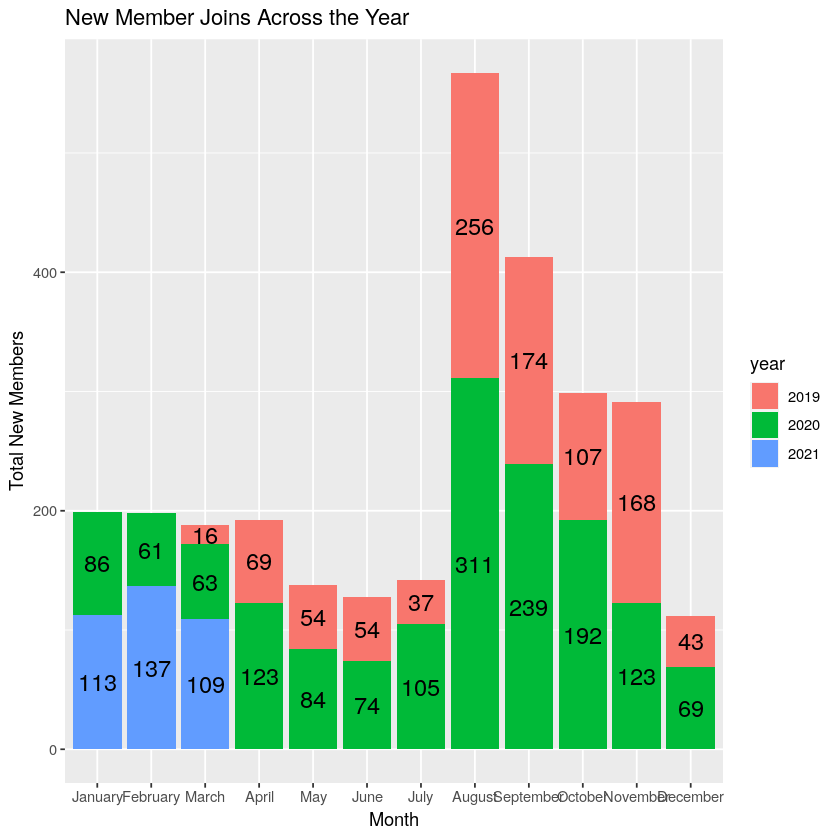

In [85]:
all_joins = ggplot(data = agg_joins, mapping = aes(x = month, y = new_members, fill = year)) + xlab("Month") + ylab("Total New Members") + geom_col()+
            geom_text(aes(label=new_members), position = position_stack(vjust= 0.5),
            colour = "black", size = 5)
all_joins = all_joins + labs(title = "New Member Joins Across the Year")
all_joins

After searching the web, I found a great stack overflow answer [How to maintain size of ggplot with long labels](https://stackoverflow.com/a/41607201) that ultimately influenced the final graphs.

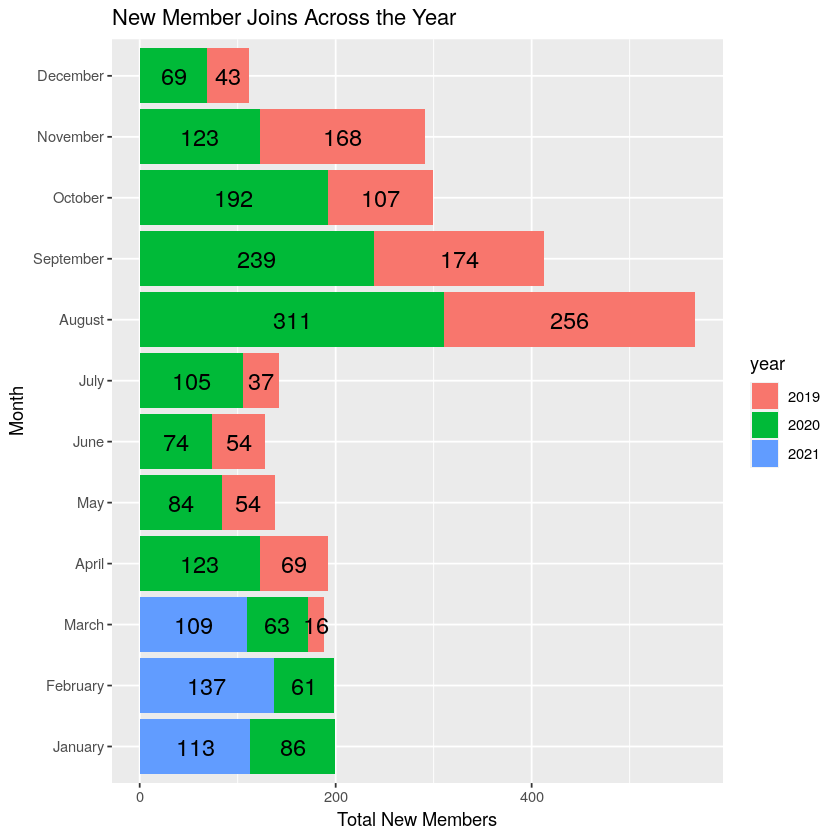

In [84]:
all_joins = ggplot(data = agg_joins, mapping = aes(x = month, y = new_members, fill = year)) + xlab("Month") + ylab("Total New Members") + geom_col()+
            geom_text(aes(label=new_members), position = position_stack(vjust= 0.5),
            colour = "black", size = 5) + coord_flip()
all_joins = all_joins + labs(title = "New Member Joins Across the Year")
all_joins

When I first made the graphs, the order of the x axis was backwards from a normal year. For the presentation I used the version above, but when I came back for the final report and final write up, I decided to search for a solution. I knew previously that `coord_flip()` was the cause of the initial reversed order. Searching [ggplot coord_flip() change order of x axis](https://duckduckgo.com/?q=ggplot+coord_flip()+change+order+of+x+axis&t=ffab&ia=web) found the answer I was looking for. The following answer from [Reversed order after coord_flip in R](https://stackoverflow.com/a/34271060) was had the solution I was looking for. I learned that I could use a limits parameter to change the order, as passing `scale_x_discrete()` with out any parameters wouldn't change my graph.

Ultimately this is the final version of the graph. For the report, I scaled the horizontal dimension to be 1920 and had the aspect ratio fixed.

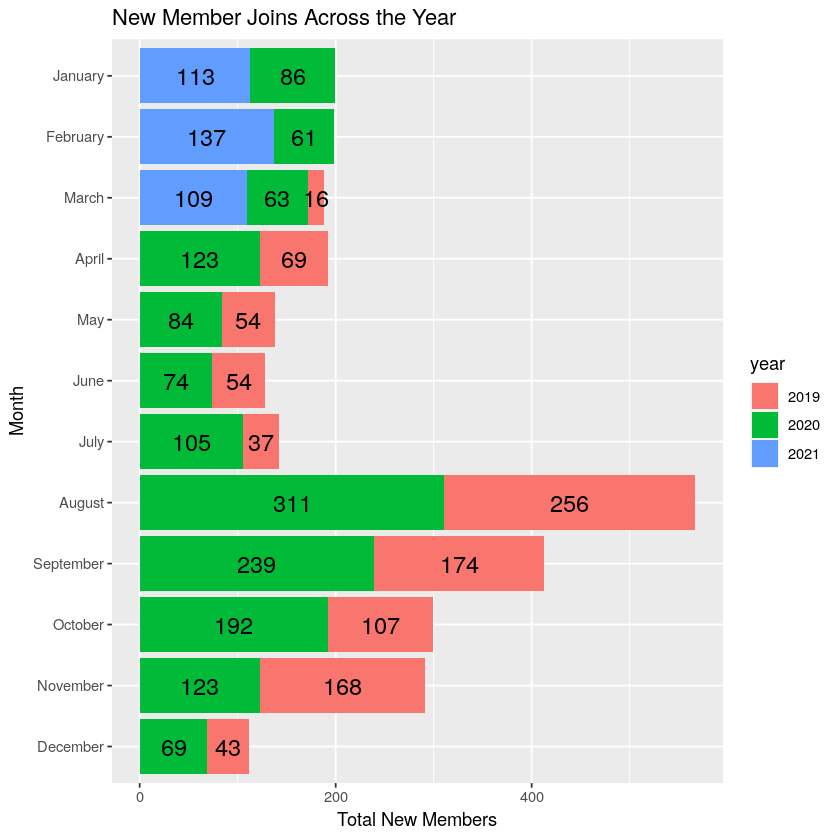

In [83]:
all_joins = ggplot(data = agg_joins, mapping = aes(x = month, y = new_members, fill = year)) + xlab("Month") + ylab("Total New Members") + geom_col()+
            geom_text(aes(label=new_members), position = position_stack(vjust= 0.5),
            colour = "black", size = 5) + coord_flip() + scale_x_discrete(limits = rev(levels(agg_joins$month)))
all_joins = all_joins + labs(title = "New Member Joins Across the Year")
all_joins

## All leaves

I decided to also make a graph for leaves, but it was ultimately scrapped because our analysis was more focused in the new user changes. Perhaps we can return to analyze the leaves

In [50]:
#collapse_output
leaves
agg_leaves.2019
agg_leaves.2020
agg_leaves.2021
agg_leaves

interval_start_timestamp,year,month,day,days_in_guild,leavers,year_type
<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for 1 month+',1,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,'Members for < 1 month',1,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for 1 month+',2,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,'Members for < 1 month',1,Normal
2019-04-01T00:00:00Z,2019,April,Monday,'Members for 1 month+',4,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,'Members for 1 month+',1,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for 1 month+',2,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,'Members for < 1 month',2,Normal


Months,Total Leavers
<fct>,<int>
March,6
April,75
May,54
June,45
July,47
August,66
September,90
October,60
November,118


Months,Total Leavers
<fct>,<int>
January,66
February,82
March,73
April,95
May,72
June,82
July,90
August,127
September,132


Months,Total Leavers
<fct>,<int>
January,93
February,88
March,78


month,year,leavers
<fct>,<fct>,<int>
March,2019,6
April,2019,75
May,2019,54
June,2019,45
July,2019,47
August,2019,66
September,2019,90
October,2019,60
November,2019,118


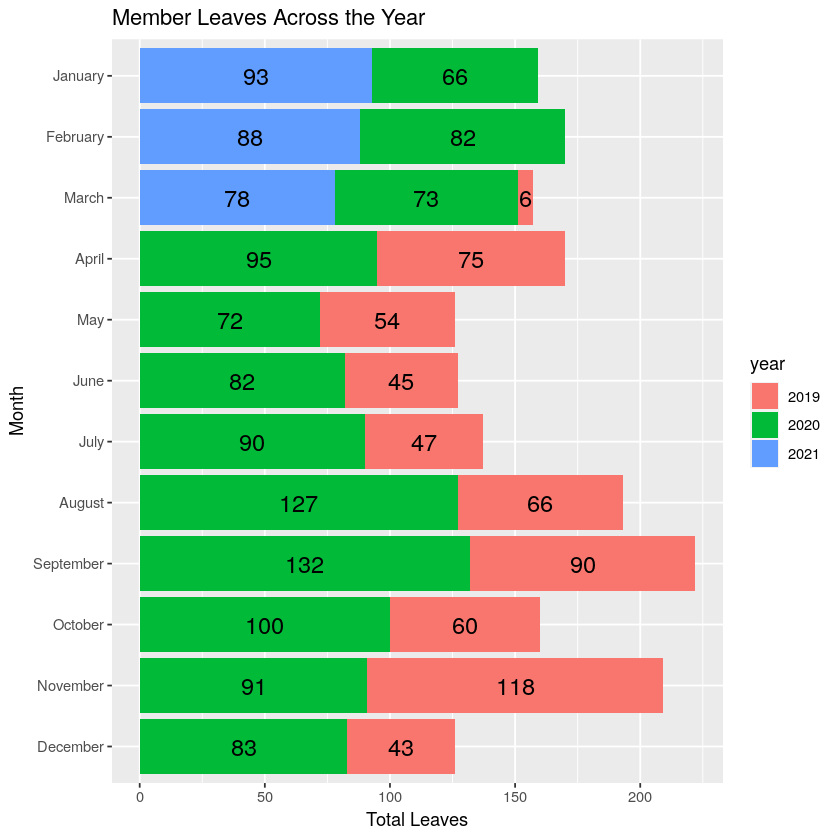

In [82]:
all_leaves = ggplot(data = agg_leaves, mapping = aes(x = month, y = leavers, fill = year)) + xlab("Month") + ylab("Total Leaves") + geom_col()+
             geom_text(aes(label=leavers), position = position_stack(vjust= 0.5),
             colour = "black", size = 5) + coord_flip() + scale_x_discrete(limits = rev(levels(agg_leaves$month)))
all_leaves = all_leaves + labs(title = "Member Leaves Across the Year")

all_leaves

## All communicators

In [52]:
#collapse_output
communicators

agg_comm.2019
agg_comm.2020
agg_comm.2021
agg_comms

interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


Months,Total Communicated
<fct>,<dbl>
March,136
April,1531
May,1238
June,1094
July,1150
August,1760
September,2588
October,2168
November,1861


Months,Total Communicated
<fct>,<dbl>
January,1094
February,1232
March,1174
April,1186
May,1077
June,1139
July,1071
August,1859
September,2175


Months,Total Communicated
<fct>,<dbl>
January,968
February,948
March,876


month,year,total_communicated
<fct>,<fct>,<dbl>
March,2019,136
April,2019,1531
May,2019,1238
June,2019,1094
July,2019,1150
August,2019,1760
September,2019,2588
October,2019,2168
November,2019,1861


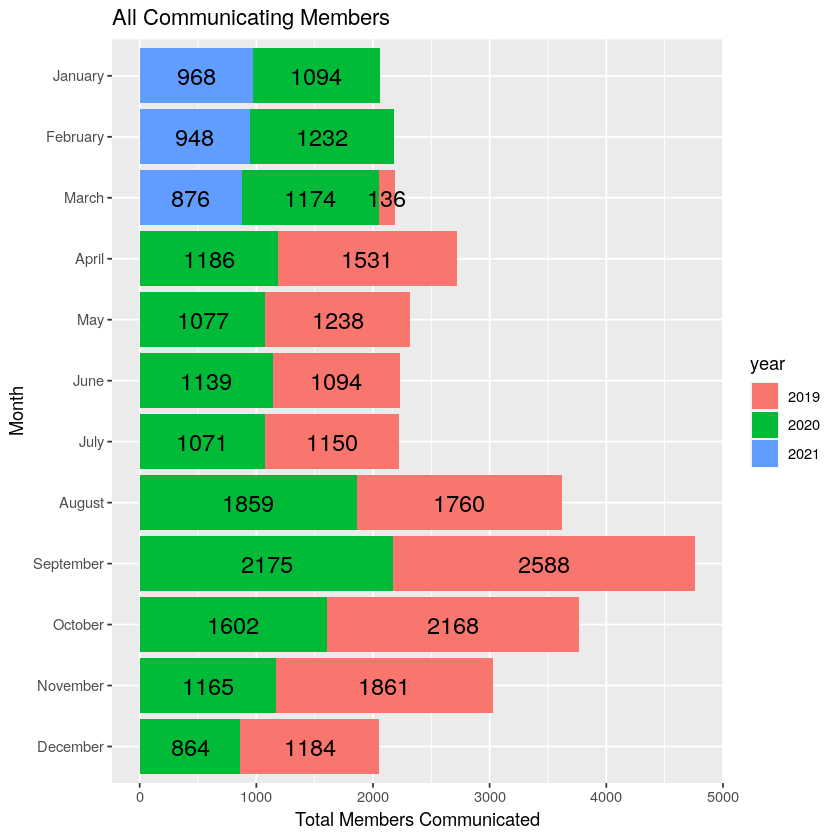

In [81]:
all_comms = ggplot(data = agg_comms, mapping = aes(x = month, y = total_communicated, fill = year)) + xlab("Month") + ylab("Total Members Communicated") +
            geom_col()+ geom_text(aes(label=total_communicated), position = position_stack(vjust= 0.5),
            colour = "black", size = 5) + coord_flip() + scale_x_discrete(limits = rev(levels(agg_comms$month)))
all_comms = all_comms + labs(title = "All Communicating Members")
all_comms

# Multiple Models Excluding Effect of Year

This section contains the code for generating linear models for the other variables we were interested in. I followed my professor's notes for setting up the parameters. For fun I decided to experiment with the messages dataset, as it included an additional variable of `messages_per_communicator` which gives a bit more granularity in comparing between individuals and aggregates for messages.

## New members linear model

In [93]:
#collapse_output
joins

interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,2,100.00000,100.00000,Normal
2019-04-05T00:00:00Z,2019,April,Friday,3,33.33333,0.00000,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,2,0.00000,0.00000,Normal


In [91]:
joins_lm = lm(new_members ~ month + year_type, data = joins)
print(summary(joins_lm))


Call:
lm(formula = new_members ~ month + year_type, data = joins)

Residuals:
   Min     1Q Median     3Q    Max 
-8.759 -2.195 -0.612  0.808 85.469 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.98132    0.80555   2.460  0.01414 *  
monthFebruary   0.26401    0.96935   0.272  0.78543    
monthMarch     -0.01493    0.95690  -0.016  0.98756    
monthApril      0.60450    0.98228   0.615  0.53848    
monthMay       -0.36969    0.97461  -0.379  0.70456    
monthJune      -0.46217    0.98228  -0.471  0.63814    
monthJuly      -0.30518    0.97461  -0.313  0.75428    
monthAugust     6.54966    0.97461   6.720 3.70e-11 ***
monthSeptember  4.28783    0.98228   4.365 1.46e-05 ***
monthOctober    2.22708    0.97461   2.285  0.02260 *  
monthNovember   2.25450    0.98228   2.295  0.02201 *  
monthDecember  -0.78905    0.97461  -0.810  0.41844    
year_typeCovid  1.22836    0.44590   2.755  0.00602 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

## Total messages linear model

In [90]:
#collapse_output
messages

interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,556,10.901961,Normal
2019-04-05T00:00:00Z,2019,April,Friday,273,5.808511,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,335,7.613636,Normal


In [89]:
messages_lm = lm(messages ~ month + year_type, data = messages)
print(summary(messages_lm))


Call:
lm(formula = messages ~ month + year_type, data = messages)

Residuals:
    Min      1Q  Median      3Q     Max 
-533.72 -131.98  -34.98   68.19 2435.80 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     370.7838    37.3808   9.919  < 2e-16 ***
monthFebruary     0.7405    44.9820   0.016  0.98687    
monthMarch       19.0476    44.4043   0.429  0.66808    
monthApril      153.6371    45.5819   3.371  0.00079 ***
monthMay         24.6162    45.2261   0.544  0.58641    
monthJune       -73.9795    45.5819  -1.623  0.10503    
monthJuly       -42.4322    45.2261  -0.938  0.34845    
monthAugust     210.2452    45.2261   4.649 3.98e-06 ***
monthSeptember  433.9371    45.5819   9.520  < 2e-16 ***
monthOctober    261.9549    45.2261   5.792 1.04e-08 ***
monthNovember   109.9371    45.5819   2.412  0.01612 *  
monthDecember   -79.8354    45.2261  -1.765  0.07795 .  
year_typeCovid -193.5419    20.6915  -9.354  < 2e-16 ***
---
Signif. codes:  0 ‘***

## Messages experiments

### Including messages_per_communicator in full model

In [75]:
#collapse_output
messages

interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,556,10.901961,Normal
2019-04-05T00:00:00Z,2019,April,Friday,273,5.808511,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,335,7.613636,Normal


In [74]:
messages_lm1 = lm(messages ~ month + year_type + messages_per_communicator, data = messages)
print(summary(messages_lm1))


Call:
lm(formula = messages ~ month + year_type + messages_per_communicator, 
    data = messages)

Residuals:
    Min      1Q  Median      3Q     Max 
-794.57  -58.66    1.20   50.09 1112.68 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -80.219     22.265  -3.603 0.000337 ***
monthFebruary               44.936     23.694   1.896 0.058298 .  
monthMarch                  13.590     23.369   0.582 0.561041    
monthApril                  12.429     24.209   0.513 0.607821    
monthMay                   -37.842     23.845  -1.587 0.112952    
monthJune                   -2.577     24.045  -0.107 0.914678    
monthJuly                  -33.459     23.802  -1.406 0.160241    
monthAugust                128.790     23.875   5.394 9.36e-08 ***
monthSeptember             311.849     24.154  12.911  < 2e-16 ***
monthOctober               187.593     23.863   7.861 1.40e-14 ***
monthNovember              101.338     23.989   4.224 

### Including messages_per_communicator in full model

In [77]:
#collapse_output
messages

interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,556,10.901961,Normal
2019-04-05T00:00:00Z,2019,April,Friday,273,5.808511,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,335,7.613636,Normal


In [76]:
messages_lm2 = lm(messages_per_communicator ~ month + year_type, data = messages)
print(summary(messages_lm2))


Call:
lm(formula = messages_per_communicator ~ month + year_type, data = messages)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5431 -2.2972 -0.7784  1.2309 28.5756 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.06881    0.56882  14.185  < 2e-16 ***
monthFebruary  -0.79070    0.68449  -1.155  0.24841    
monthMarch      0.09763    0.67570   0.144  0.88515    
monthApril      2.52633    0.69362   3.642  0.00029 ***
monthMay        1.11743    0.68821   1.624  0.10489    
monthJune      -1.27745    0.69362  -1.842  0.06593 .  
monthJuly      -0.16054    0.68821  -0.233  0.81561    
monthAugust     1.45731    0.68821   2.118  0.03456 *  
monthSeptember  2.18426    0.69362   3.149  0.00171 ** 
monthOctober    1.33040    0.68821   1.933  0.05361 .  
monthNovember   0.15385    0.69362   0.222  0.82452    
monthDecember  -1.19681    0.68821  -1.739  0.08246 .  
year_typeCovid -2.80785    0.31486  -8.918  < 2e-16 ***
---
Signif. codes:  0 ‘

## Voices linear model

In [79]:
#collapse_output
voices

interval_start_timestamp,year,month,day,speaking_minutes,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,0,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,0,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,0,Normal
2019-04-01T00:00:00Z,2019,April,Monday,0,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,0,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,0,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,0,Normal
2019-04-05T00:00:00Z,2019,April,Friday,0,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,0,Normal


In [78]:
voices_lm = lm(speaking_minutes ~ month + year_type, data = voices)
print(summary(voices_lm))


Call:
lm(formula = speaking_minutes ~ month + year_type, data = voices)

Residuals:
    Min      1Q  Median      3Q     Max 
-928.94 -287.96  -21.33  150.04 2268.59 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      238.42      68.62   3.475 0.000542 ***
monthFebruary     53.85      82.57   0.652 0.514493    
monthMarch       261.27      81.51   3.205 0.001409 ** 
monthApril      -217.09      83.67  -2.595 0.009665 ** 
monthMay        -269.06      83.02  -3.241 0.001246 ** 
monthJune       -225.25      83.67  -2.692 0.007265 ** 
monthJuly       -265.07      83.02  -3.193 0.001470 ** 
monthAugust      142.77      83.02   1.720 0.085914 .  
monthSeptember   474.25      83.67   5.668 2.09e-08 ***
monthOctober     463.99      83.02   5.589 3.25e-08 ***
monthNovember    256.21      83.67   3.062 0.002280 ** 
monthDecember     -9.41      83.02  -0.113 0.909785    
year_typeCovid   216.28      37.98   5.694 1.81e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 

## Communicators linear model

In [95]:
#collapse_output
communicators

interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


In [96]:
communicators_lm = lm(total_communicated ~ month + year_type, data = communicators)
print(summary(communicators_lm))


Call:
lm(formula = total_communicated ~ month + year_type, data = communicators)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.805  -7.258  -1.258   5.628  77.195 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     42.1266     1.9689  21.396  < 2e-16 ***
monthFebruary    4.9875     2.3693   2.105  0.03563 *  
monthMarch       2.7318     2.3388   1.168  0.24318    
monthApril       7.5910     2.4009   3.162  0.00163 ** 
monthMay        -0.3536     2.3821  -0.148  0.88203    
monthJune       -0.4757     2.4009  -0.198  0.84300    
monthJuly       -1.8698     2.3821  -0.785  0.43277    
monthAugust     20.6786     2.3821   8.681  < 2e-16 ***
monthSeptember  41.6910     2.4009  17.365  < 2e-16 ***
monthOctober    23.1141     2.3821   9.703  < 2e-16 ***
monthNovember   12.7410     2.4009   5.307 1.49e-07 ***
monthDecember   -4.6601     2.3821  -1.956  0.05082 .  
year_typeCovid  -8.8685     1.0899  -8.137 1.79e-15 ***
---
Signif. codes:  0 ‘**

# Testing Year Effect
After our group presented our project, our professor was concerned that there was confounding variables that the anova test had not factored in. Thus for our final report, we generated multiple regression models

## New members multiple regression model

In [66]:
#collapse_output
joins

interval_start_timestamp,year,month,day,new_members,pct_communicated,pct_opened_channels,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,2,50.00000,50.00000,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,6,16.66667,33.33333,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,8,25.00000,37.50000,Normal
2019-04-01T00:00:00Z,2019,April,Monday,9,44.44444,33.33333,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,2,50.00000,100.00000,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,0,NA,NA,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,2,100.00000,100.00000,Normal
2019-04-05T00:00:00Z,2019,April,Friday,3,33.33333,0.00000,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,2,0.00000,0.00000,Normal


In [65]:
joins_lm = lm(new_members ~ month + year + year_type, data = joins)
print(summary(joins_lm))


Call:
lm(formula = new_members ~ month + year + year_type, data = joins)

Residuals:
   Min     1Q Median     3Q    Max 
-8.751 -2.100 -0.594  0.789 85.461 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.10756    0.89191   1.242 0.214722    
monthFebruary   0.27963    0.96663   0.289 0.772452    
monthMarch      0.10295    0.95562   0.108 0.914240    
monthApril      1.48651    1.05476   1.409 0.159174    
monthMay        0.51231    1.04767   0.489 0.624990    
monthJune       0.41984    1.05476   0.398 0.690719    
monthJuly       0.57683    1.04767   0.551 0.582092    
monthAugust     7.43167    1.04767   7.094 3.15e-12 ***
monthSeptember  5.16984    1.05476   4.901 1.18e-06 ***
monthOctober    3.10909    1.04767   2.968 0.003101 ** 
monthNovember   3.13651    1.05476   2.974 0.003042 ** 
monthDecember   0.09296    1.04767   0.089 0.929323    
year2020        1.21187    0.44469   2.725 0.006584 ** 
ye

## Total messages multiple regression model

In [80]:
#collapse_output
messages

interval_start_timestamp,year,month,day,messages,messages_per_communicator,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,334,6.301887,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,236,6.210526,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,364,8.088889,Normal
2019-04-01T00:00:00Z,2019,April,Monday,404,5.386667,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,543,11.312500,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,324,7.200000,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,556,10.901961,Normal
2019-04-05T00:00:00Z,2019,April,Friday,273,5.808511,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,335,7.613636,Normal


In [67]:
messages_lm = lm(messages ~ month + year +  year_type, data = messages)
print(summary(messages_lm))


Call:
lm(formula = messages ~ month + year + year_type, data = messages)

Residuals:
    Min      1Q  Median      3Q     Max 
-533.05 -127.07  -32.48   66.92 2435.13 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     441.7623    41.0836  10.753  < 2e-16 ***
monthFebruary    -0.5282    44.5253  -0.012  0.99054    
monthMarch        9.4722    44.0183   0.215  0.82968    
monthApril       81.9887    48.5851   1.688  0.09194 .  
monthMay        -47.0322    48.2583  -0.975  0.33009    
monthJune      -145.6279    48.5851  -2.997  0.00282 ** 
monthJuly      -114.0806    48.2583  -2.364  0.01835 *  
monthAugust     138.5968    48.2583   2.872  0.00420 ** 
monthSeptember  362.2887    48.5851   7.457 2.57e-13 ***
monthOctober    190.3065    48.2583   3.943 8.82e-05 ***
monthNovember    38.2887    48.5851   0.788  0.43091    
monthDecember  -151.4838    48.2583  -3.139  0.00176 ** 
year2020       -192.2022    20.4837

## Voices multiple regression model

In [69]:
#collapse_output
voices

interval_start_timestamp,year,month,day,speaking_minutes,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,0,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,0,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,0,Normal
2019-04-01T00:00:00Z,2019,April,Monday,0,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,0,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,0,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,0,Normal
2019-04-05T00:00:00Z,2019,April,Friday,0,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,0,Normal


In [70]:
voices_lm = lm(speaking_minutes ~ month + year + year_type, data = voices)
summary(voices_lm)


Call:
lm(formula = speaking_minutes ~ month + year + year_type, data = voices)

Residuals:
    Min      1Q  Median      3Q     Max 
-925.30 -193.30  -24.96  135.36 2264.95 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -146.89      68.66  -2.139   0.0327 *  
monthFebruary     60.74      74.41   0.816   0.4146    
monthMarch       313.25      73.56   4.258 2.33e-05 ***
monthApril       171.85      81.19   2.117   0.0346 *  
monthMay         119.88      80.65   1.487   0.1376    
monthJune        163.68      81.19   2.016   0.0442 *  
monthJuly        123.87      80.65   1.536   0.1250    
monthAugust      531.71      80.65   6.593 8.37e-11 ***
monthSeptember   863.18      81.19  10.631  < 2e-16 ***
monthOctober     852.93      80.65  10.576  < 2e-16 ***
monthNovember    645.15      81.19   7.946 7.50e-15 ***
monthDecember    379.53      80.65   4.706 3.03e-06 ***
year2020         209.00      34.23   6.106

## Communicators multiple regression model

In [73]:
#collapse_output
communicators

interval_start_timestamp,year,month,day,visitors,pct_communicated,total_communicated,year_type
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>
2019-03-29T00:00:00Z,2019,March,Friday,206,25.72816,53,Normal
2019-03-30T00:00:00Z,2019,March,Saturday,184,20.65217,38,Normal
2019-03-31T00:00:00Z,2019,March,Sunday,185,24.32432,45,Normal
2019-04-01T00:00:00Z,2019,April,Monday,328,22.86585,75,Normal
2019-04-02T00:00:00Z,2019,April,Tuesday,143,33.56643,48,Normal
2019-04-03T00:00:00Z,2019,April,Wednesday,271,16.60517,45,Normal
2019-04-04T00:00:00Z,2019,April,Thursday,381,13.38583,51,Normal
2019-04-05T00:00:00Z,2019,April,Friday,190,24.73684,47,Normal
2019-04-06T00:00:00Z,2019,April,Saturday,163,26.99387,44,Normal


In [72]:
communicators_lm = lm(total_communicated ~ month + year + year_type, data = communicators)
summary(communicators_lm)


Call:
lm(formula = total_communicated ~ month + year + year_type, data = communicators)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.780  -7.398  -1.624   6.070  77.220 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      44.837      2.175  20.612  < 2e-16 ***
monthFebruary     4.939      2.357   2.095  0.03652 *  
monthMarch        2.366      2.331   1.015  0.31033    
monthApril        4.855      2.572   1.887  0.05953 .  
monthMay         -3.090      2.555  -1.209  0.22696    
monthJune        -3.212      2.572  -1.249  0.21223    
monthJuly        -4.606      2.555  -1.803  0.07187 .  
monthAugust      17.942      2.555   7.022 5.09e-12 ***
monthSeptember   38.955      2.572  15.143  < 2e-16 ***
monthOctober     20.378      2.555   7.975 6.03e-15 ***
monthNovember    10.005      2.572   3.889  0.00011 ***
monthDecember    -7.396      2.555  -2.895  0.00391 ** 
year2020         -8.817      1.08